In [15]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, roc_curve
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('affair_data.csv')
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [4]:
Y = data['affair']
X = data[data.columns[:-1]]
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0


In [5]:
model = LogisticRegression()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
model.fit(X_train, Y_train)
predictions = model.predict_proba(X_test)

In [6]:
#из лекции
tp = 0 # True positive
fp = 0 # False positive
fn = 0 # False negative
tn = 0 # True negative

predictions = model.predict_proba( X_test )
for predicted_prob, actual in zip( predictions[:, 1], Y_test ):    
    if predicted_prob >= 0.5:
        predicted = 1
    else:
        predicted = 0
    
    if predicted == 1:
        if actual == 1:
            tp += 1
        else:
            fp += 1
    
    else:
        if actual == 1:
            fn += 1
        else:
            tn += 1

In [7]:
#True positive rate
tpr = tp / (tp + fn)
tpr

0.3723228995057661

In [8]:
#False positive rate
fpr = fp / (fp + tn)
fpr

0.10053722179585571

In [22]:
fpr_ = []
tpr_ = []

P = sum(Y_test)
N = len(Y_test) - P

thresholds = np.arange(0.0, 1.01, .01)

for thresh in thresholds:
    FP=0
    TP=0
    for predicted_prob, actual in zip( predictions[:, 1], Y_test ):
        if predicted_prob > thresh:
            if actual == 1:
                TP = TP + 1
            if actual == 0:
                FP = FP + 1
    fpr_.append(FP/float(N))
    tpr_.append(TP/float(P))

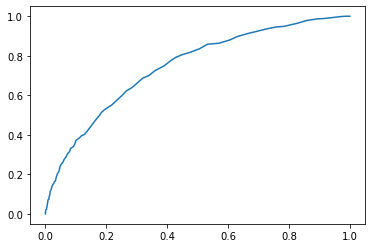

In [23]:
plt.plot(fpr_, tpr_) #для данных ручной функции
plt.show()

In [24]:
fpr2, tpr2, thres = roc_curve(Y_test, predictions[:, 1])

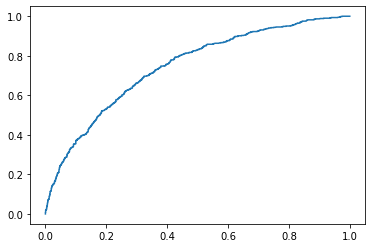

In [25]:
plt.plot( fpr2, tpr2 ) #для данных roc_curve 

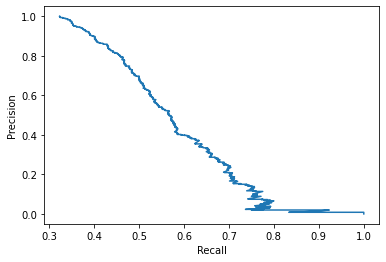

In [26]:
#график Precision - Recall
precision, recall, thresholds1 = precision_recall_curve(Y_test, predictions[:, 1])
plt.plot(precision, recall)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()